# Features

## a) Name Spoofing
### Data Exploration

In [119]:
%matplotlib inline
import numpy as np
import pandas as pd
import pickle

In [120]:
## plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
## modelling packages
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest
from feature_format import featureFormat, targetFeatureSplit
import tester

In [122]:
with open("final_project_dataset.pkl", "rb") as data_file:
    my_dataset = pickle.load(data_file)

# read into dataframe
df = pd.DataFrame.from_dict(my_dataset,orient='index')
df = df.replace('NaN',np.nan)

In [123]:
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,...,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,NaN,2660303.0,NaN,False,NaN,-1386055.0,1586055.0,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,...,NaN,NaN,69.0,NaN,False,NaN,-201641.0,NaN,frank.bay@enron.com,NaN


In [124]:
df.shape

(146, 21)

### Outlier Detection

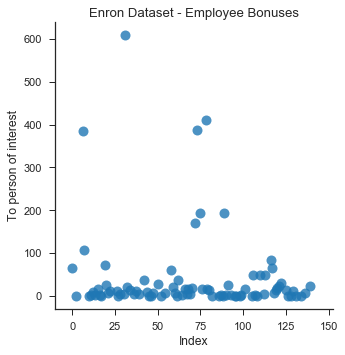

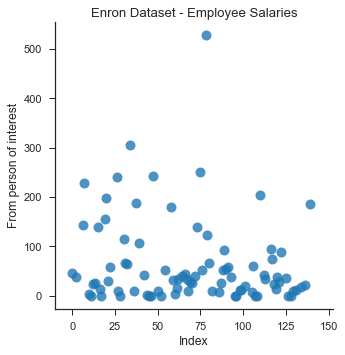

In [125]:
df['prev_index'] = df.index
df = df.reset_index()
#setting index to mark each record
df['index'] = df.index

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('index', 'from_this_person_to_poi',  data=df,  fit_reg=False,  scatter_kws={"marker": "D", "s": 100});
plt.title('Enron Dataset - Interst employee to messages');
plt.xlabel('Index');
plt.ylabel('To person of interest');

sns.lmplot('index', 'from_poi_to_this_person', data=df,fit_reg=False,  scatter_kws={"marker": "D", "s": 100});
plt.title('Enron Dataset - From interest employee messages');
plt.xlabel('Index');
plt.ylabel('From person of interest');

In [115]:
my


{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

### Outlier Detection


Here the outlier is total because it has all values as NaN and so it can be clearly seen that only one object is going away from others in that graph we remove the outlier

In [128]:
##ON analysis it was seen that outlier is total which will cause trouble as all it's value for from a poi or to a poi 
# it's value is NaN

my_dataset.pop('TOTAL');#removed the outlier

df=pd.DataFrame.from_dict(my_dataset,orient='index')
df=df.replace('NaN',np.nan)
df['prev_index']=df.index
df=df.reset_index()
df['index']=df.index

("This enron datatset contains a total of %s Person of Interest(Spear's in phishing)", 18)


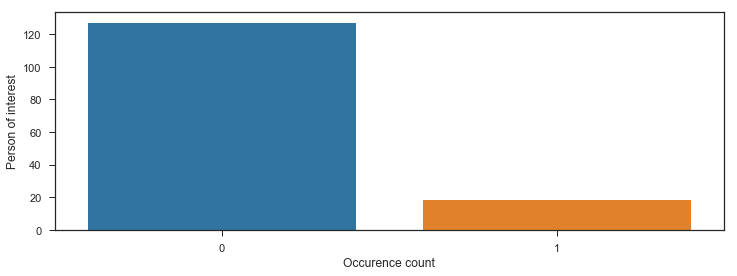

In [129]:
df['poi']=df['poi'].apply(lambda x: 1 if x else 0)
poi = df.poi.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(poi.index,poi.values)
plt.xlabel('Occurence count')
plt.ylabel('Person of interest')
print('This enron datatset contains a total of %s Person of Interest(Spear\'s in phishing)',sum(df['poi']))

In [118]:
##correaltation of POIs

all = df.count()
pois = df[df['poi']==1].count()
result=pd.concat([all,pois],axis=1)
result.columns =['All records','POIs']
result

,All records,POIs
index,146,18
salary,95,17
to_messages,86,14
deferral_payments,39,5
total_payments,125,18
exercised_stock_options,102,12
bonus,82,16
restricted_stock,110,17
shared_receipt_with_poi,86,14
restricted_stock_deferred,18,0


In [16]:
features_list = ['poi','to_messages',  'from_poi_to_this_person',
                    'from_this_person_to_poi', 'from_messages']

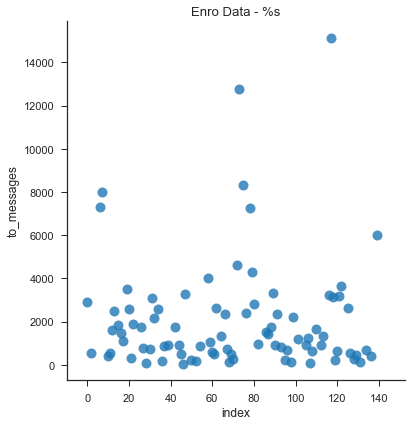

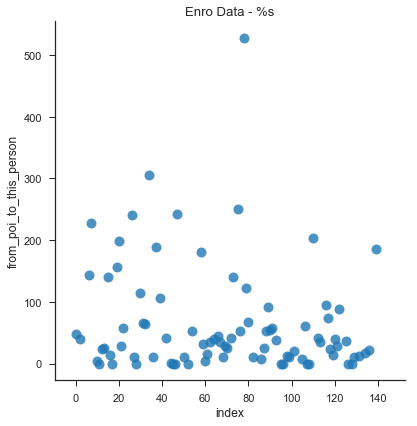

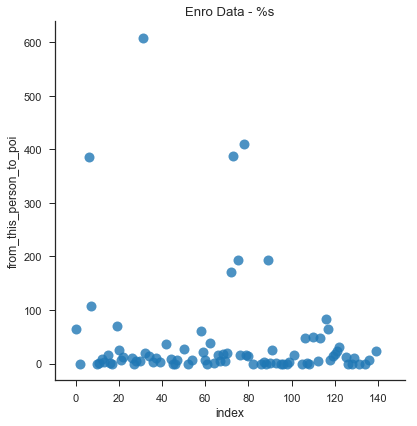

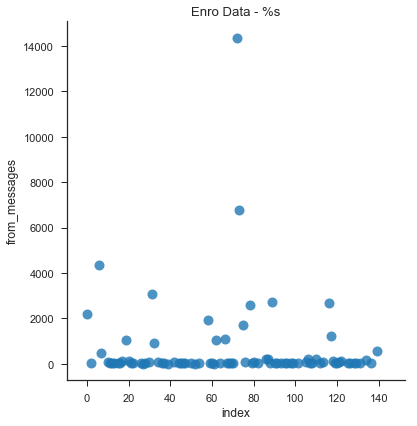

In [21]:
for feature in features_list[1:]:
    try:
        sns.lmplot('index',feature,data=df,fit_reg=False, scatter_kws={"marker": "D","s": 100},size=6)
        plt.title("Enro Data - %s",feature)
        plt.xlabel("Index")
        plt.ylabel(feature)    
    except:
        pass

### Feature Engineering


Here we are refining feature of interests to drill down are analysis

In [22]:
df['frac_to_poi']=df['from_this_person_to_poi']/df['to_messages']
df['frac_from_poi']=df['from_poi_to_this_person']/df['to_messages']

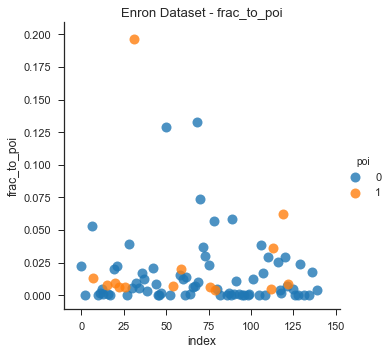

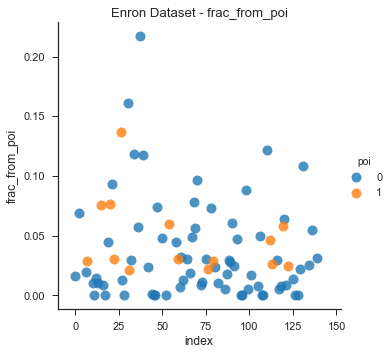

In [33]:
feature_set=['frac_to_poi','frac_from_poi']
for feature in feature_set:
    sns.lmplot('index', feature, data=df,  fit_reg=False,   hue="poi",  scatter_kws={"marker": "D", "s": 100})
    plt.title('Enron Dataset - %s' % feature);
    plt.xlabel("index")
    plt.ylabel(feature)

#### Data Cleaning(2)


In [57]:
df = df.fillna("NaN")
dataset=df.T.to_dict()

In [58]:
data = featureFormat(dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

## Data Modeling and Validation

## SVM Model and Accuracy

In [48]:
#SVM model
from sklearn import svm
svm = Pipeline([('scaler',StandardScaler()),('svm',svm.SVC())])
param_grid = ([{'svm__C': [1,100,1000,10000],
                'svm__gamma': [0.5, 0.1, 0.01],
                'svm__degree':[3,4],
                'svm__kernel': ['rbf','poly']}])
svm_clf = GridSearchCV(svm, param_grid, scoring='recall').fit(features, labels).best_estimator_
tester.test_classifier(svm_clf, dataset, features_list)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.84956	Precision: 0.28040	Recall: 0.22600	F1: 0.25028	F2: 0.23512
	Total predictions: 9000	True positives:  226	False positives:  580	False negatives:  774	True negatives: 7420



## Random Forest & it's Accuracy

In [50]:
#Random forest
rmf = Pipeline([('scaler',StandardScaler()),('rf',RandomForestClassifier())])
param_grid = ([{'rf__n_estimators': [2,4,8,11]}])
rmf_clf = GridSearchCV(rmf, param_grid, scoring='recall').fit(features, labels).best_estimator_

tester.test_classifier(rmf_clf, dataset, features_list)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
      ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
	Accuracy: 0.84444	Precision: 0.16102	Recall: 0.09500	F1: 0.11950	F2: 0.10349
	Total predictions: 9000	True positives:   95	False positives:  495	False negatives:  905	True negatives: 7505



## K-Nearest Neighbours & it's Accuracy

In [60]:
#K-NN model pipeline
knb = Pipeline([('scaler', StandardScaler()),('knb', KNeighborsClassifier())])
param_grid = ([{'knb__n_neighbors': [8,9,10,11,12,13]}])
knb_clf = GridSearchCV(knb, param_grid, scoring='recall').fit(features, labels).best_estimator_

tester.test_classifier(knb_clf, dataset, features_list)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knb', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform'))])
	Accuracy: 0.87722	Precision: 0.00935	Recall: 0.00100	F1: 0.00181	F2: 0.00122
	Total predictions: 9000	True positives:    1	False positives:  106	False negatives:  999	True negatives: 7894



## Conclusion Part a

In this section we took enron dataset and used the person of interest dataframe and carried out analysis on sender and recipents from this persons. We analyzed who are attackers and how likely we are able to predict the attacker based on Unsupervised learning like SVM, Random Forst, KNN. So this dataset will give us a base in our analysis to find the Name spoofers and Unsupervised learning will help us determine the previously unseen attacker.With this analysis we can determine the anomoly score and analysis of anomolous dataset as was done in this case of Enron dataset.

# b) Content based features

These features help catch the lure phase of spearphishing attack.As we detect the name and address spoofing in python and mysql database with the help of unique function.

So here we use the emails features like from, to and body and do unsupervised machine learning with the help of clustering methods to find "outliers".

In [65]:
from helpers import *
import pandas as pd

In [66]:
emails = pd.read_csv('split_emails.csv')
print emails.shape

(10000, 3)


## Content Features & Previously seen attacker

Now here we use the content of the email and characterize them if they likely to cause phishing or not. So the detection is also taking into account the to and from attributes we are able to find and cluster which set of names were attacked(victim) and the person who usually cause the attack(attackers).


How we do that is, we take the email as a whole document and in that we take 3 kinds of cluster based on to, from and body. Then we come to know who are those usual "to" (the victims),"from" (attackers) and "body" (keywords only) as we use the term frequency library it tells us which names and which keywords were used in the phishing email.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

In [68]:
email_df = pd.DataFrame(parse_into_emails(emails.message))

In [69]:
email_df.drop(email_df.query("body == '' | to == '' | from_ == ''").index,inplace=True)

In [70]:
vect=TfidfVectorizer(stop_words='english',max_df=0.50,min_df=2)
X=vect.fit_transform(email_df.body)

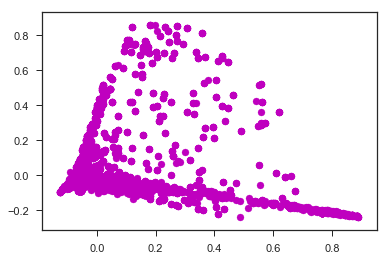

In [71]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:,0],coords[:,1],c='m')
plt.show()

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from main import *

### Here we have the scoring for each of the attributes noted above

#### Clustering based on score and here we find out the most occuring words in phishing 

In [80]:
n_clusters=3
clf=KMeans(n_clusters=n_clusters,max_iter=100,init='k-means++',n_init=1)
labels=clf.fit_predict(X)

In [81]:
X_dense=X.todense()
pca=PCA(n_components=2).fit(X_dense)
coords=pca.transform(X_dense)

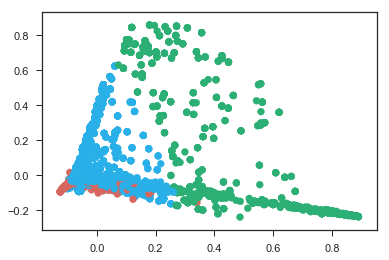

In [82]:
label_colors=["#2AB0E9","#2BAF74","#D7665E","#CCCCCC","#D2CA0D","#522A64","#A3DB05","#FC6514"]
colors = [label_colors[i] for i in labels]
plt.scatter(coords[:,0],coords[:,1],c=colors)


In [85]:
centroids = clf.cluster_centers_
cetroid_coords= pca.transform(centroids)

In [87]:
cetroid_coords

array([[-0.04374797, -0.00757637],
       [ 0.48340427,  0.11753493],
       [-0.06412125, -0.05101762]])

In [88]:
features=vect.get_feature_names()

### These are the words and names found in the Phishing emails as per enron dataset

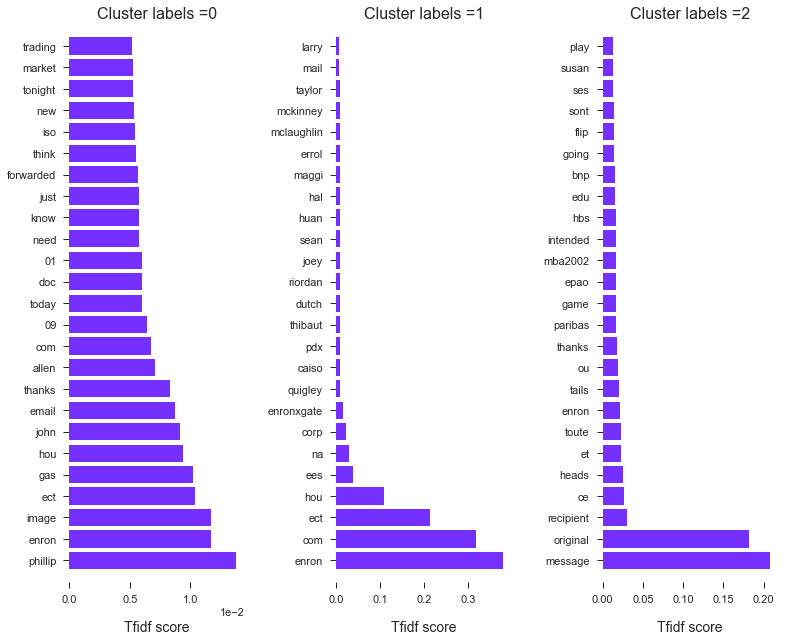

In [90]:
plot_tfidf_classfeatures_h(top_features_per_cluster(X,labels,features,0.1,25))

## Conclusion Part b

In this section we analysed the "contents" of each and every spearphished emails and brought out serveral words based tfidf library.That is, more these terms were more the frequency.Hence for future analysis when we get more dataset of our own we can use these models and these suspicious words to determine anamoly score or the deviation score as we have all the words used in "phishing email" which covers first part of their taxamony effectively the lure phase based on words in email as well.

### References

<a href ="https://www.cs.cmu.edu/~./enron/"> Enron Dataset</a> <br/>
<a href="https://www.udacity.com/course/intro-to-machine-learning--ud120" >Udacity Machine learning</a><br/>
<a href="http://archive.ics.uci.edu/ml/datasets/URL+Reputation"> UCI Enron Datase</a><br/>
